# Final Project Big Data Analytics

<i> Disusun oleh Mushofa Ina Malaya

Project ini bertujuan untuk menganalisis data Boston Housing dan menerapkan beberapa model regresi serta memilih model mana yang terbaik.

#### Data : Boston Housing Dataset

#### Data Set Information
The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 13 features for homes from various suburbs in Boston, Massachusetts.

The variable names are as follows:
1. CRIM: per capita crime rate by town.
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of nonretail business acres per town.
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. NOX: nitric oxides concentration (parts per 10 million).
6. RM: average number of rooms per dwelling.
7. AGE: proportion of owner-occupied units built prior to 1940.
8. DIS: weighted distances to five Boston employment centers.
9. RAD: index of accessibility to radial highways.
10. TAX: full-value property-tax rate per $10,000.
11. PTRATIO: pupil-teacher ratio by town.
12. B: 1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town.
13. LSTAT: % lower status of the population.

target => MEDV: Median value of owner-occupied homes in $1000s.

#### Source URL
https://www.kaggle.com/schirmerchad/bostonhoustingmlnd <br>
https://github.com/udacity/machine-learning <br>
https://archive.ics.uci.edu/ml/datasets/Housing

## Analisis Dataset Boston Housing

Pertama yang dilakukan adalah meload data dari file dataset housing.csv. Untuk memudahkan pengambilan data pada kolom, tidak lupa menampilkan nama-nama kolomnya.

In [1]:
import pandas as pd # membaca dan menuliskan dataset menjadi dataframe

data = pd.read_csv("https://baketku.s3.amazonaws.com/housing.csv") # mengambil data dari file housing.csv

print(data.head()) # menampilkan 5 data pertama

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


Dari proses di atas, akhirnya dapat nama-nama field (kolom) dari dataset. Nama-nama kolom ini nanti penting ketika dalam proses komputasi terkait pengambilan data pada masing - masing kolom.

Sebelum menuju ke langkah selanjutnya, terlebih dahulu harus dilakukan langkah pre-processing (data cleaning dan data preparing). Melakukan pengecekan apakah di dalam dataset terdapat missing value atau tidak.

In [2]:
data.isnull().sum() # mengecek missing value

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Nah, diperoleh hasil bahwa setiap kolom bernilai 0, artinya isnull = False atau tidak ada missing value dalam data

### Scatter Plot untuk masing - masing features

Next, kita buat scatter plot untuk masing - masing features berdasarkan dataset. Setiap feature (crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b dan lstat) diplotkan dengan target yaitu variable medv.

In [3]:
import matplotlib.pyplot as plt # menampilkan scatter plot

# scatter plot untuk masing-masing features
print('          ===== scatter plot A =====')
plt.scatter(data['crim'], data['medv']) 
plt.title("Grafik Hubungan CRIM\nTerhadap MEDV", fontsize = 15)
plt.xlabel("CRIM")
plt.ylabel("MEDV")
plt.show()

# scatter plot untuk masing-masing features
print('          ===== scatter plot B =====')
plt.scatter(data['zn'], data['medv']) 
plt.title("Grafik Hubungan ZN\nTerhadap MEDV", fontsize = 15)
plt.xlabel("ZN")
plt.ylabel("MEDV")
plt.show()

# scatter plot untuk masing-masing features
print('          ===== scatter plot C =====')
plt.scatter(data['indus'], data['medv']) 
plt.title("Grafik Hubungan INDUS\nTerhadap MEDV", fontsize = 15)
plt.xlabel("INDUS")
plt.ylabel("MEDV")
plt.show()

# scatter plot untuk masing-masing features
print('          ===== scatter plot D =====')
plt.scatter(data['chas'], data['medv']) 
plt.title("Grafik Hubungan CHAS\nTerhadap MEDV", fontsize = 15)
plt.xlabel("CHAS")
plt.ylabel("MEDV")
plt.show()

# scatter plot untuk masing-masing features
print('          ===== scatter plot E =====')
plt.scatter(data['nox'], data['medv']) 
plt.title("Grafik Hubungan NOX\nTerhadap MEDV", fontsize = 15)
plt.xlabel("NOX")
plt.ylabel("MEDV")
plt.show()

# scatter plot untuk masing-masing features
print('          ===== scatter plot F =====')
plt.scatter(data['rm'], data['medv']) 
plt.title("Grafik Hubungan RM\nTerhadap MEDV", fontsize = 15)
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

# scatter plot untuk masing-masing features
print('          ===== scatter plot G =====')
plt.scatter(data['age'], data['medv']) 
plt.title("Grafik Hubungan AGE\nTerhadap MEDV", fontsize = 15)
plt.xlabel("AGE")
plt.ylabel("MEDV")
plt.show()

# scatter plot untuk masing-masing features
print('          ===== scatter plot H =====')
plt.scatter(data['dis'], data['medv']) 
plt.title("Grafik Hubungan DIS\nTerhadap MEDV", fontsize = 15)
plt.xlabel("DIS")
plt.ylabel("MEDV")
plt.show()

# scatter plot untuk masing-masing features
print('          ===== scatter plot I =====')
plt.scatter(data['rad'], data['medv']) 
plt.title("Grafik Hubungan RAD\nTerhadap MEDV", fontsize = 15)
plt.xlabel("RAD")
plt.ylabel("MEDV")
plt.show()

# scatter plot untuk masing-masing features
print('          ===== scatter plot J =====')
plt.scatter(data['tax'], data['medv']) 
plt.title("Grafik Hubungan TAX\nTerhadap MEDV", fontsize = 15)
plt.xlabel("TAX")
plt.ylabel("MEDV")
plt.show()

# scatter plot untuk masing-masing features
print('          ===== scatter plot K =====')
plt.scatter(data['ptratio'], data['medv']) 
plt.title("Grafik Hubungan PTRATIO\nTerhadap MEDV", fontsize = 15)
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")
plt.show()

# scatter plot untuk masing-masing features
print('          ===== scatter plot L =====')
plt.scatter(data['b'], data['medv']) 
plt.title("Grafik Hubungan B\nTerhadap MEDV", fontsize = 15)
plt.xlabel("B")
plt.ylabel("MEDV")
plt.show()

# scatter plot untuk masing-masing features
print('          ===== scatter plot M =====')
plt.scatter(data['lstat'], data['medv']) 
plt.title("Grafik Hubungan LSTAT\nTerhadap MEDV", fontsize = 15)
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()



          ===== scatter plot A =====


<Figure size 640x480 with 1 Axes>

          ===== scatter plot B =====


<Figure size 640x480 with 1 Axes>

          ===== scatter plot C =====


<Figure size 640x480 with 1 Axes>

          ===== scatter plot D =====


<Figure size 640x480 with 1 Axes>

          ===== scatter plot E =====


<Figure size 640x480 with 1 Axes>

          ===== scatter plot F =====


<Figure size 640x480 with 1 Axes>

          ===== scatter plot G =====


<Figure size 640x480 with 1 Axes>

          ===== scatter plot H =====


<Figure size 640x480 with 1 Axes>

          ===== scatter plot I =====


<Figure size 640x480 with 1 Axes>

          ===== scatter plot J =====


<Figure size 640x480 with 1 Axes>

          ===== scatter plot K =====


<Figure size 640x480 with 1 Axes>

          ===== scatter plot L =====


<Figure size 640x480 with 1 Axes>

          ===== scatter plot M =====


<Figure size 640x480 with 1 Axes>

Berdasarkan pola data dari beberapa scatter plot diatas, terdapat beberapa data yang tidak memiliki pola berarti. Misalnya pada scatter plot B, scatter plot D, scatter plot I, scatter plot J. Scatter plot tersebut memiliki pola vertical yang menunjukkan tidak ada asosiasi antara variable yang diplot,  <br>
<b> Untuk 2 features yang memiliki dugaan kuat ada korelasi </b> yaitu pada <b> scatter plot F </b> dan <b> scatter plot M </b>, karena dari plot tersebut tampak ada pola linier yang menunjukkan bahwa kedua variable yang diobservasi bergerak atau berubah secara bersamaan (linier). 


### Statistik Deskriptif

Untuk mengetahui 2 features mana yang mempunyai korelasi paling tinggi, mari buat statistik deskriptifnya (mean, standar deviasi, intercept, coefficients dan R²). Disini akan diambil contoh scatter plot D, F dan M

In [4]:
import numpy as np 

# mean data untuk variabel salary dan usia
mean_chas = np.mean(data['chas'])
mean_rm = np.mean(data['rm'])
mean_lstat = np.mean(data['lstat'])
mean_medv = np.mean(data['medv'])
# standar deviasi untuk variabel salary dan usia
stdev_chas = np.std(data['chas'])
stdev_rm = np.std(data['rm'])
stdev_lstat = np.std(data['lstat'])
stdev_medv = np.std(data['medv'])

# cetak
print("===== Mean =====")
print("Mean CHAS  = %.3f" %mean_chas)
print("Mean RM  = %.3f" %mean_rm)
print("Mean LSTAT  = %.3f" %mean_lstat)
print("Mean MEDV    = %.3f" %mean_medv)
print("\n===== Standar Deviasi =====")
print("StDev CHAS = %.3f" %stdev_chas)
print("StDev RM = %.3f" %stdev_rm)
print("StDev LSTAT = %.3f" %stdev_lstat)
print("StDev MEDV   = %.3f" %stdev_medv)

===== Mean =====
Mean CHAS  = 0.069
Mean RM  = 6.285
Mean LSTAT  = 12.653
Mean MEDV    = 22.533

===== Standar Deviasi =====
StDev CHAS = 0.254
StDev RM = 0.702
StDev LSTAT = 7.134
StDev MEDV   = 9.188


Standar deviasi adalah bentuk pengukuran yang digunakan untuk mengukur jumlah variasi atau sebaran sejumlah nilai data. Standar deviasi dalam statistik deskriptif ini banyak digunakan untuk menghitung variabilitas atau keragaman yang digunakan dalam statistik dan teori probabilitas. 

Nilai standar deviasi pada dasarnya menggambarkan besaran sebaran suatu kelompok data terhadap rata-ratanya atau dengan kata lain gambaran keheterogenan suatu kelompok data. Selain digunakan untuk analisis statistik, standar deviasi juga bisa digunakan untuk menentukan jumlah risiko dan volatilitas terkait dengan investasi tertentu.

Selanjutnya, membuat grafik graph untuk medv berdasarkan chas, rm dan lstat

medv  chas
5.0   0        2
5.6   0        1
6.3   0        1
7.0   0        2
7.2   0        3
7.4   0        1
7.5   0        1
8.1   0        1
8.3   0        2
8.4   0        2
8.5   0        2
8.7   0        1
8.8   0        2
9.5   0        1
9.6   0        1
9.7   0        1
10.2  0        3
10.4  0        2
10.5  0        2
10.8  0        1
10.9  0        2
11.0  0        1
11.3  0        1
11.5  0        1
11.7  0        2
11.8  0        2
11.9  0        2
12.0  0        1
12.1  0        1
12.3  0        1
              ..
35.4  0        2
36.0  0        1
36.1  0        1
36.2  0        2
36.4  0        1
36.5  0        1
37.0  0        1
37.2  0        1
37.3  0        1
37.6  0        1
37.9  0        1
38.7  0        1
39.8  0        1
41.3  0        1
41.7  0        1
42.3  0        1
42.8  0        1
43.1  0        1
43.5  0        1
43.8  0        1
44.0  0        1
44.8  0        1
45.4  0        1
46.0  1        1
46.7  0        1
48.3  0        1
48.5  0        1
48.

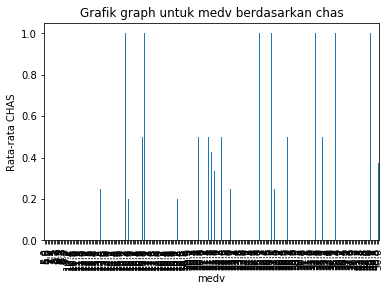

In [5]:
import numpy as np

print(data.groupby('medv').chas.value_counts())
print(data.groupby('medv').chas.mean().value_counts())

data.groupby('medv').chas.mean().plot(kind="bar")
plt.xlabel('medv')
plt.ylabel('Rata-rata CHAS')
plt.title('Grafik graph untuk medv berdasarkan chas')
plt.show()

medv  rm   
5.0   5.453    1
      5.683    1
5.6   5.987    1
6.3   5.852    1
7.0   4.519    1
      5.414    1
7.2   5.277    1
      6.343    1
      6.434    1
7.4   5.000    1
7.5   6.782    1
8.1   5.093    1
8.3   5.349    1
      5.896    1
8.4   5.935    1
      6.824    1
8.5   5.531    1
      5.747    1
8.7   6.152    1
8.8   4.368    1
      5.957    1
9.5   6.380    1
9.6   6.461    1
9.7   5.036    1
10.2  4.880    1
      5.837    1
      6.223    1
10.4  5.304    1
      6.968    1
10.5  4.652    1
              ..
41.7  8.337    1
42.3  7.610    1
42.8  8.259    1
43.1  7.520    1
43.5  7.470    1
43.8  7.820    1
44.0  7.454    1
44.8  8.266    1
45.4  7.820    1
46.0  7.645    1
46.7  7.686    1
48.3  8.247    1
48.5  7.853    1
48.8  8.398    1
50.0  4.970    1
      5.875    1
      6.216    1
      6.683    1
      7.016    1
      7.489    1
      7.802    1
      7.831    1
      7.875    1
      7.923    1
      7.929    1
      8.034    1
      8.297    1
  

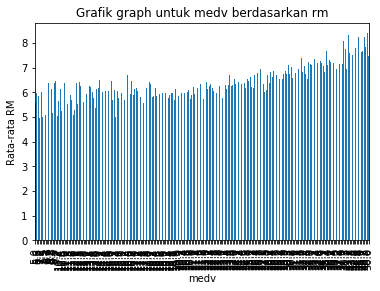

In [6]:
import numpy as np

print(data.groupby('medv').rm.value_counts())
print(data.groupby('medv').rm.mean().value_counts())

data.groupby('medv').rm.mean().plot(kind="bar")
plt.xlabel('medv')
plt.ylabel('Rata-rata RM')
plt.title('Grafik graph untuk medv berdasarkan rm')
plt.show()

medv  lstat
5.0   22.98    1
      30.59    1
5.6   26.77    1
6.3   29.97    1
7.0   23.97    1
      36.98    1
7.2   20.32    1
      29.05    1
      30.81    1
7.4   31.99    1
7.5   25.79    1
8.1   29.68    1
8.3   19.77    1
      24.39    1
8.4   22.74    1
      34.02    1
8.5   19.92    1
      27.38    1
8.7   26.45    1
8.8   20.62    1
      30.63    1
9.5   24.08    1
9.6   18.05    1
9.7   25.68    1
10.2  15.69    1
      21.78    1
      30.62    1
10.4  17.21    1
      26.64    1
10.5  22.11    1
              ..
41.7  2.47     1
42.3  3.11     1
42.8  3.54     1
43.1  7.26     1
43.5  3.16     1
43.8  3.57     1
44.0  3.11     1
44.8  4.14     1
45.4  3.76     1
46.0  3.01     1
46.7  3.92     1
48.3  3.95     1
48.5  3.81     1
48.8  5.91     1
50.0  1.73     1
      1.92     1
      2.88     1
      2.96     1
      2.97     1
      3.16     1
      3.26     1
      3.32     1
      3.70     1
      3.73     1
      4.45     1
      4.63     1
      5.12     1
  

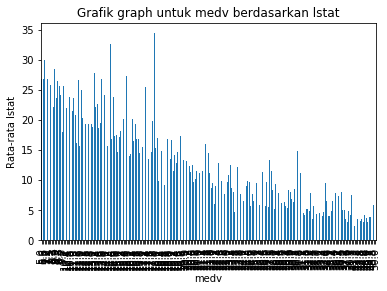

In [7]:
import numpy as np

print(data.groupby('medv').lstat.value_counts())
print(data.groupby('medv').lstat.mean().value_counts())

data.groupby('medv').lstat.mean().plot(kind="bar")
plt.xlabel('medv')
plt.ylabel('Rata-rata lstat')
plt.title('Grafik graph untuk medv berdasarkan lstat')
plt.show()

Dari 3 gambar grafik graph diatas dapat disimpulkan bahwa : 
1. Grafik graph untuk medv berdasarkan chas tidak memiliki pola berarti
2. Grafik graph untuk medv berdasarkan rm memiliki pola linier yang menunjukkan bahwa kedua variable yang diobservasi bergerak atau berubah secara bersamaan (linier) 
3. Grafik graph untuk medv berdasarkan lstat juga memiliki pola linier yang menunjukkan bahwa kedua variable yang diobservasi bergerak atau berubah secara bersamaan (linier)

### Analisis Model Regresi

Next, mari cari nilai R2 dari beberapa 2 features diatas. Yang nantinya dapat dilakukan analisis mengenai model regresinya. 


In [8]:
import numpy as np # untuk melakukan perhitungan efisien
from sklearn.linear_model import LinearRegression

x1 = np.array(data['chas']).reshape((-1,1)) # Variabel bebas yang diubah dari column menjadi baris
x2 = np.array(data['rm']).reshape((-1,1)) # Variabel bebas yang diubah dari column menjadi baris
x3 = np.array(data['lstat']).reshape((-1,1)) # Variabel bebas yang diubah dari column menjadi baris

y = np.array(data['medv']) # Variabel terikat

model = LinearRegression()
model.fit(x1,y)
model.fit(x2,y)
model.fit(x3,y)

intercept = model.intercept_ # Menghitung Intersepsi (b0)
coefficients = model.coef_[0] # Menghitung Koefisien (b1)
r_sq1 = model.score(x1,y) # Menghitung hubungan variabel x dan y
r_sq2 = model.score(x2,y) # Menghitung hubungan variabel x dan y
r_sq3 = model.score(x3,y) # Menghitung hubungan variabel x dan y


print('Intercept: {:0.2f}'.format(intercept))
print('Coefficients: {:0.2f}'.format(coefficients))
print('R\u00b2 Scatter Plot D: {:0.2f}'.format(r_sq1))
print('R\u00b2 Scatter Plot F: {:0.2f}'.format(r_sq2))
print('R\u00b2 Scatter Plot M: {:0.2f}'.format(r_sq3))

Intercept: 34.55
Coefficients: -0.95
R² Scatter Plot D: -1.70
R² Scatter Plot F: -0.54
R² Scatter Plot M: 0.54


Diperoleh hasil nilai R2 tertinggi adalah R2 scatter plot M yaitu antara lstat dan medv.
So... 2 features antara LSTAT dan MEDV yang akan dianalisis lebih lanjut.

Langkah selanjutnya yaitu menentukan model regresi apa yang sesuai dengan pola sebaran data dari scatter plot. Apakah model regresi linear atau nonlinear? <br>
Dalam menentukan model regresi, dapat dilihat melalui nilai R2 nya. R2 merupakan ukuran kecocokan hasil estimasi sebuah model regresi linier dengan data yang dimodelkan. Apabila nilai R2 mendekati 1 maka dapat mengunakan model regresi linear.

Berdasarkan R2 dari scatter plot M = 0.54 yang diperkirakan merupakan R2 tertinggi dari setiap scatter plot dari dataset, maka dapat disimpulkan bahwa data ini kurang tepat jika menggunakan model regresi linear. 


Next, membuat model regresi nonlinear yang sesuai dengan pola sebaran data scatter plot.

Model regresi nonlinear yang akan digunakan antara lain :
1. Sigmoid
2. Eksponensial
3. Quadratic
4. Qubic 

Sekarang, mari kita bangun model regresi nonlinear dan inisialisasi parameternya.

In [9]:
# pendefinian dari fungsi - fungsi 
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y
def eksponensial(x, Beta_1, Beta_2):
     y = Beta_1*np.exp(Beta_2*x)
     return y
def Quadratic(x, Beta_1, Beta_2, Beta_3):
     y = Beta_1+Beta_2*x**1+Beta_3*x**2
     return y
def Qubic(x, Beta_1, Beta_2, Beta_3, Beta_4):
     y = Beta_1+Beta_2*x**1+Beta_3*x**2+Beta_4*x**3
     return y

x_data, y_data = (data["lstat"].values, data["medv"].values)

Lalu kita normalkan dulu x dan y

In [10]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

Untuk menemukan parameter terbaik yaitu dengan menggunakan curve_fit. Curve_fit menggunakan kuadrat terkecil nonlinear agar sesuai dengan model regresi yang telah dibuat. 

popt adalah parameter yang dioptimalkan.

In [11]:
from scipy.optimize import curve_fit


popt1, pcov1 = curve_fit(sigmoid, xdata, ydata, maxfev=100000)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt1[0], popt1[1]))

popt2, pcov2 = curve_fit(eksponensial, xdata, ydata, maxfev=100000)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt1[0], popt1[1]))

popt3, pcov3 = curve_fit(Quadratic, xdata, ydata, maxfev=100000)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt3[0], popt3[1]))

from scipy.optimize import curve_fit
popt4, pcov4 = curve_fit(Qubic, xdata, ydata, maxfev=100000)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt4[0], popt4[1]))



 beta_1 = 0.000003, beta_2 = 71716.806835
 beta_1 = 0.000003, beta_2 = 71716.806835
 beta_1 = 0.857240, beta_2 = -1.771544
 beta_1 = 0.972993, beta_2 = -2.935531


Next, plotkan model regresi yang dihasilkan.

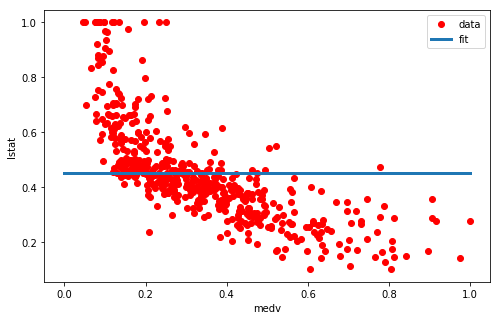

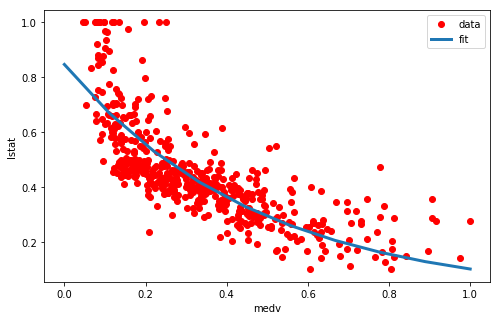

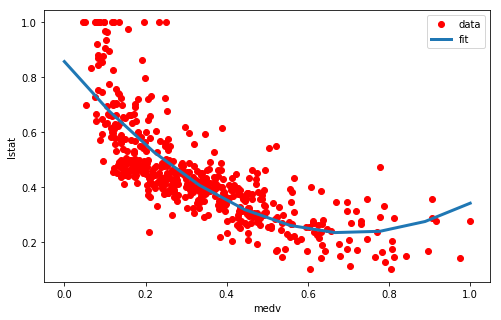

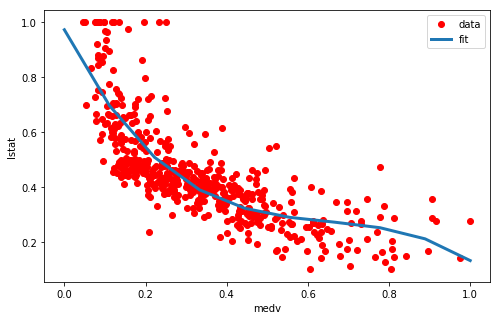

In [12]:
x = np.arange(0, 10, 1)
x = x/max(x)
plt.figure(figsize=(8,5))
y1 = sigmoid(x, *popt1)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y1, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('lstat')
plt.xlabel('medv')
plt.show()

x = np.arange(0, 10, 1)
x = x/max(x)
plt.figure(figsize=(8,5))
y2 = eksponensial(x, *popt2)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y2, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('lstat')
plt.xlabel('medv')
plt.show()

x = np.arange(0, 10, 1)
x = x/max(x)
plt.figure(figsize=(8,5))
y3 = Quadratic(x, *popt3)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y3, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('lstat')
plt.xlabel('medv')
plt.show()

x = np.arange(0, 10, 1)
x = x/max(x)
plt.figure(figsize=(8,5))
y4 = Qubic(x, *popt4)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y4, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('lstat')
plt.xlabel('medv')
plt.show()


Dari beberapa gambar diatas, masih belum dapat diketahui model mana yang paling cocok untuk digunakan. Oleh karena itu, perlu menghitung keakurasian dari model yang telah dibuat. 

In [13]:
# split data into train/test
msk = np.random.rand(len(data)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt1, pcov1 = curve_fit(sigmoid, train_x, train_y, maxfev=100000)
popt2, pcov2 = curve_fit(eksponensial, train_x, train_y, maxfev=100000)
popt3, pcov3 = curve_fit(Quadratic, train_x, train_y, maxfev=100000)
popt4, pcov4 = curve_fit(Qubic, train_x, train_y, maxfev=100000)


# predict using test set
y_hat1 = sigmoid(test_x, *popt1)
y_hat2 = eksponensial(test_x, *popt2)
y_hat3 = Quadratic(test_x, *popt3)
y_hat4 = Qubic(test_x, *popt4)


# evaluation
print("===== Sigmoid =====")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat1 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat1 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat1 , test_y) )

# evaluation
print("===== Eksponensial =====")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat2 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat2 , test_y) )

# evaluation
print("===== Quadratic =====")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat3 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat3 , test_y) )

# evaluation
print("===== Qubic =====")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat4 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat4 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat4 , test_y) )



===== Sigmoid =====
Mean absolute error: 0.12
Residual sum of squares (MSE): 0.03
R2-score: -1811881026556.61
===== Eksponensial =====
Mean absolute error: 0.08
Residual sum of squares (MSE): 0.01
R2-score: 0.58
===== Quadratic =====
Mean absolute error: 0.08
Residual sum of squares (MSE): 0.01
R2-score: 0.57
===== Qubic =====
Mean absolute error: 0.07
Residual sum of squares (MSE): 0.01
R2-score: 0.58


Nah... diperoleh nilai R2 dari beberapa model regresi. Untuk menentukan model mana yang paling sesuai yaitu dilihat nilai R2 yang paling tinggi, yaitu model <b> Qubic </b>

### Analisis Clustering

Dari dataset diatas dapat kita analisis <b> K-Means Clustering </b>. Tujuannya untuk menemukan grup dalam data, dengan jumlah grup yang diwakili oleh variable k. Variable k sendiri adalah jumlah cluster yang kita inginkan.

First... menentukan variabel yang diklusterkan. Disini menggunakan variable madv pada sumbu X dan variabel lstat pada sumbu Y 

In [14]:
# Menentukan variabel yang akan di klusterkan 
medv_x = data.iloc[:, 12:14]
medv_x.head()

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


Selanjutnya yaitu memvisualisasikan persebaran data.

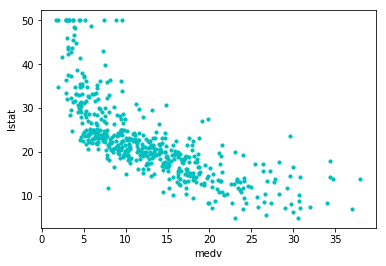

In [15]:
# Memvisualkan persebaran data 
plt.scatter(data['lstat'], data['medv'], s =10, c = "c", marker = "o", alpha = 1)
plt.ylabel('lstat')
plt.xlabel('medv')
plt.show()

Lalu menentukan nilai k. Namun sebelum itu, harus mengubah variable data frame menjadi array terlebih dahulu

In [16]:
#Mengubah Variabel Data Frame Menjadi Array 
x_array =  np.array(medv_x)
print(x_array)

[[ 4.98 24.  ]
 [ 9.14 21.6 ]
 [ 4.03 34.7 ]
 ...
 [ 5.64 23.9 ]
 [ 6.48 22.  ]
 [ 7.88 11.9 ]]


Next, menstandarkan kembali ukuran variable, agar data dapat kembali seperti jenis data diawal sebelum di array kan

In [17]:
# Menstandarkan Ukuran Variabel 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.08967991, 0.42222222],
       [0.2044702 , 0.36888889],
       [0.06346578, 0.66      ],
       ...,
       [0.10789183, 0.42      ],
       [0.13107064, 0.37777778],
       [0.16970199, 0.15333333]])

Langkah selanjutnya yaitu menentukan nilai k.
Dalam hal ini, nilai k (n_cluster) atau nilai arbitrer bebas ditentukan. Dikonfigurasi dan ditentukan nilai K sebesar 3 cluster. Selain itu juga menetukan kluster dari data yang telah di standarkan .

In [18]:
# Menentukan dan mengkonfigurasi fungsi kmeans 
kmeans = KMeans(n_clusters = 3, random_state=123)
# Menentukan kluster dari data ---
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

Setelah itu memvisualisasikan cluster.
Untuk memvisualisasikan cluster, harus menampilkan centroid terlebih dahulu.

In [19]:
# Menampilkan pusat cluster 
print(kmeans.cluster_centers_)

[[0.08618152 0.74257982]
 [0.55818297 0.19006441]
 [0.2419428  0.37833926]]


Baru kemudian menampilkan hasil cluster dan menambah kolom data frame

In [20]:
# Menampilkan Hasil Kluster 
print(kmeans.labels_)
# Menambahkan Kolom "kluster" Dalam Data Frame Driver 
data["kluster"] = kmeans.labels_

[2 2 0 0 0 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 2 2 1 2 1 1 1 2 2
 2 2 0 0 2 2 2 2 2 2 1 1 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 1 1 1 2 1 1 2 1 2 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 1 0 2 2 2 0 0 0 2 2 0 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2
 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 2 2 2 1 2 1 2 2 1 2 2 2 2 2 2 1
 2 2 0 0 0 0 0 0 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 1 2 2 2 2 2 2 0 0 2 2 0 0 0
 0 0 0 0 2 0 2 2 0 0 2 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 2 2 0 0 2 2 2 2
 2 2 2 0 2 2 2 0 0 2 0 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 0
 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 2 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 1 1 1 1 2 

Langkah terakhir mari visualisasikan hasil clusternya.

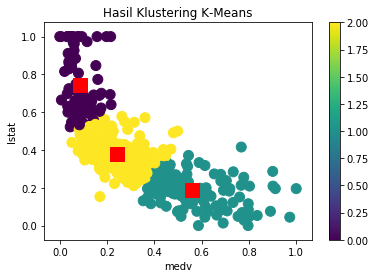

In [21]:
# Memvisualkan hasil kluster ---
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = data.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="s");
plt.title("Hasil Klustering K-Means")
plt.ylabel('lstat')
plt.xlabel('medv')
plt.colorbar (output)
plt.show()

Dari gambar diatas, dapat dilihat bahwa antara LSTAT dan MEDV telah <b> tercluster menjadi 3 </b>